In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from merge_data import last_day_of_month
import datetime as dt

In [13]:
hist_all = pd.DataFrame()
hist_conv = pd.DataFrame()

for y in np.arange(1985,2006):
    for m in [12,1,2]:
        date = dt.datetime(y,m,1)
        try:
            hist_all = pd.concat([hist_all,
                              pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_ACCESS1-0_historical_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
                             axis=0)
            hist_conv = pd.concat([hist_conv,
                              pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_conv_ACCESS1-0_historical_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
                             axis=0)            
        except:
            print("Skipping "+date.strftime("%Y%m%d")+"...")

Skipping 19850101...
Skipping 19850201...
Skipping 20051201...


In [14]:
rcp_all = pd.DataFrame()
rcp_conv = pd.DataFrame()

for y in np.arange(2039,2060):
    for m in [12,1,2]:
        date = dt.datetime(y,m,1)
        try:
            rcp_all = pd.concat([rcp_all,
                              pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_ACCESS1-0_rcp85_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
                             axis=0)
            rcp_conv = pd.concat([rcp_conv,
                              pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_conv_ACCESS1-0_rcp85_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
                             axis=0)            
        except:
            print("Skipping "+date.strftime("%Y%m%d")+"...")

Skipping 20390101...
Skipping 20390201...
Skipping 20591201...


Text(0.5, 1.0, 'Histograms of daily-domain maximum wind gusts (land only)')

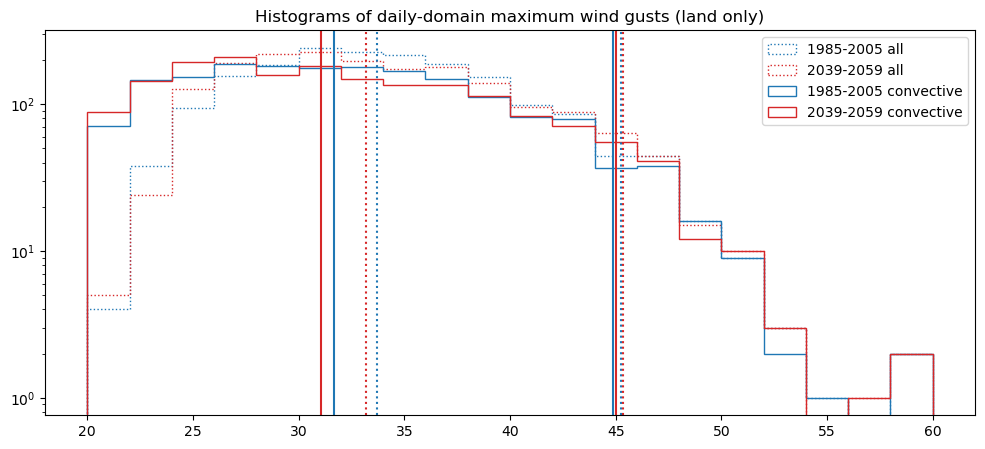

In [67]:
plt.figure(figsize=[12,5])

plt.hist(hist_all.gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),ls=":",color="tab:blue",label="1985-2005 all")
plt.hist(rcp_all.gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),ls=":",label="2039-2059 all")

plt.hist(hist_conv.gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),color="tab:blue",label="1985-2005 convective")
plt.hist(rcp_conv.gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),label="2039-2059 convective")

plt.legend()

def plot_quant(q):
    plt.gca().axvline(hist_all.gust_dmax.quantile(q),color="tab:blue",ls=":")
    plt.gca().axvline(rcp_all.gust_dmax.quantile(q),color="tab:red",ls=":")
    plt.gca().axvline(hist_conv.gust_dmax.quantile(q),color="tab:blue")
    plt.gca().axvline(rcp_conv.gust_dmax.quantile(q),color="tab:red")
    
plot_quant(0.5)
plot_quant(0.95)

plt.title("Histograms of daily-domain maximum wind gusts (land only)")

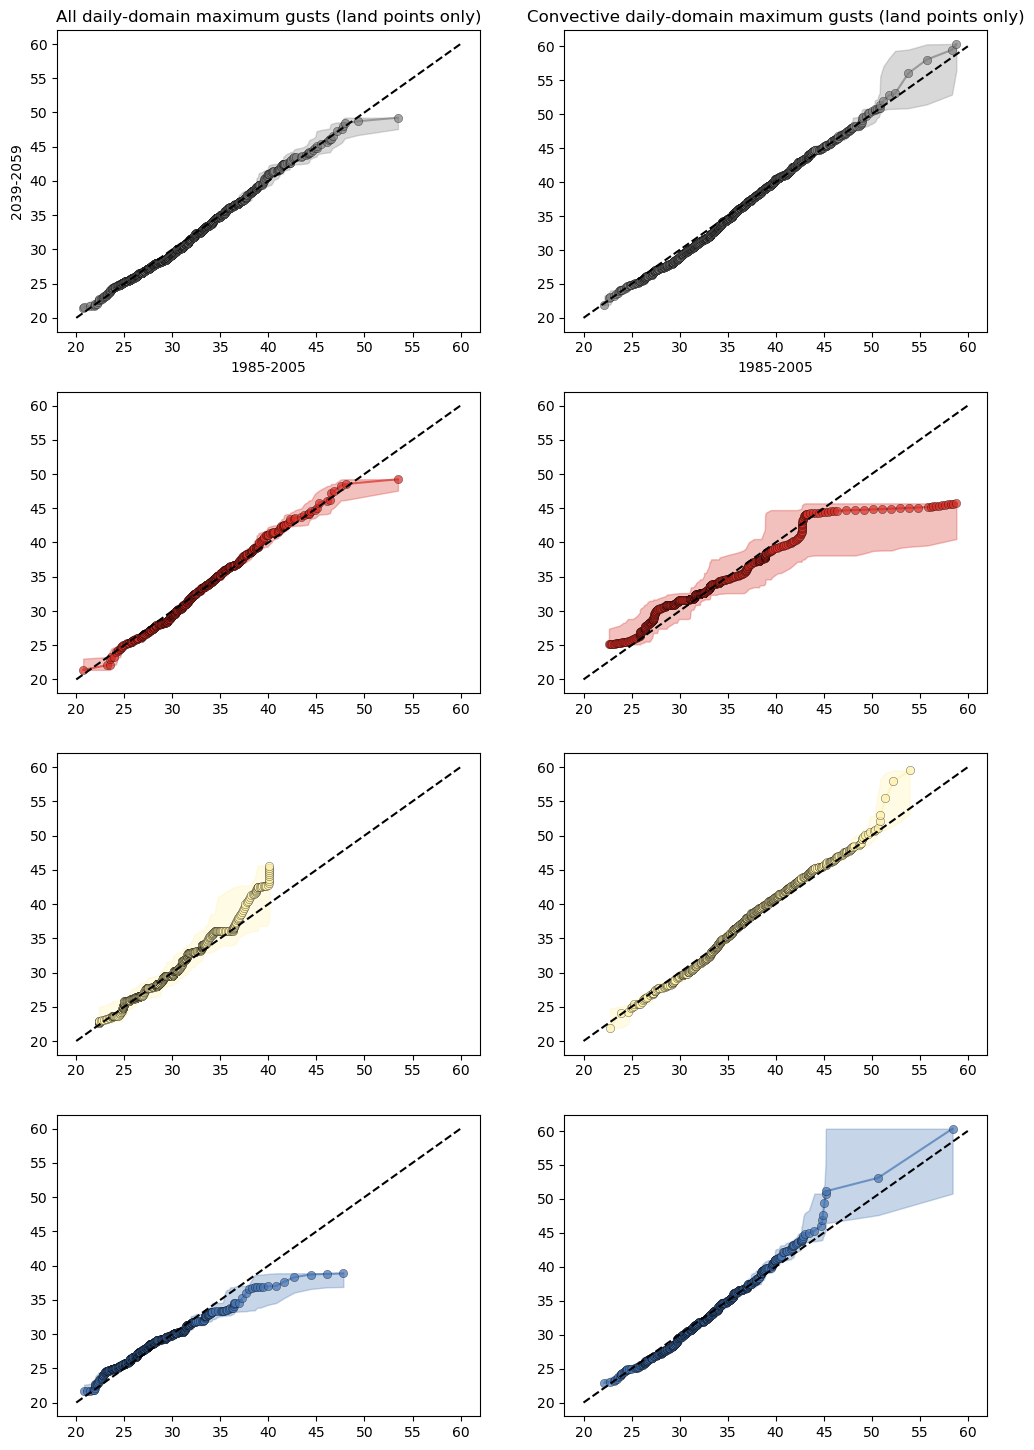

In [104]:
def plot_qq(df1, df2, p, c):
    plt.plot(np.percentile(df1.gust_dmax,np.linspace(0,100,p)),np.percentile(df2.gust_dmax,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color=c)
    mod_resamp = [np.percentile(df2.gust_dmax.values[np.random.randint(0,df2.shape[0],df2.shape[0])],np.linspace(0,100,p)) for N in np.arange(1000)]
    plt.fill_between(np.percentile(df1.gust_dmax,np.linspace(0,100,p)),np.percentile(np.stack(mod_resamp),2.5,axis=0),np.percentile(np.stack(mod_resamp),97.5,axis=0), color=c,alpha=0.3)
    plt.plot([20,60],[20,60],color="k",ls="--")

plt.figure(figsize=[12,18])
plt.subplot(4,2,1)
plot_qq(hist_all.query("wgr_dmax<1.5"), rcp_all.query("wgr_dmax<1.5"), 1000, "tab:grey")
plt.title("All daily-domain maximum gusts (land points only)")
plt.ylabel("2039-2059")
plt.xlabel("1985-2005")

plt.subplot(4,2,2)
plot_qq(hist_all.query("wgr_dmax>=1.5"), rcp_all.query("wgr_dmax>=1.5"), 1000, "tab:grey")
plt.title("Convective daily-domain maximum gusts (land points only)")
plt.xlabel("1985-2005")

plt.subplot(4,2,3)
plot_qq(hist_all.query("(cluster==0) & (wgr_dmax<1.5)"), rcp_all.query("(cluster==0) & (wgr_dmax<1.5)"), 500, plt.get_cmap("RdYlBu")(0.1))

plt.subplot(4,2,4)
plot_qq(hist_all.query("(cluster==0) & (wgr_dmax>=1.5)"), rcp_all.query("(cluster==0) & (wgr_dmax>=1.5)"), 500, plt.get_cmap("RdYlBu")(0.1))

plt.subplot(4,2,5)
plot_qq(hist_all.query("(cluster==1) & (wgr_dmax<1.5)"), rcp_all.query("(cluster==1) & (wgr_dmax<1.5)"), 500, plt.get_cmap("RdYlBu")(0.46))

plt.subplot(4,2,6)
plot_qq(hist_all.query("(cluster==1) & (wgr_dmax>=1.5)"), rcp_all.query("(cluster==1) & (wgr_dmax>=1.5)"), 500, plt.get_cmap("RdYlBu")(0.46))

plt.subplot(4,2,7)
plot_qq(hist_all.query("(cluster==2) & (wgr_dmax<1.5)"), rcp_all.query("(cluster==2) & (wgr_dmax<1.5)"), 500, plt.get_cmap("RdYlBu")(0.9))

plt.subplot(4,2,8)
plot_qq(hist_all.query("(cluster==2) & (wgr_dmax>=1.5)"), rcp_all.query("(cluster==2) & (wgr_dmax>=1.5)"), 500, plt.get_cmap("RdYlBu")(0.9))



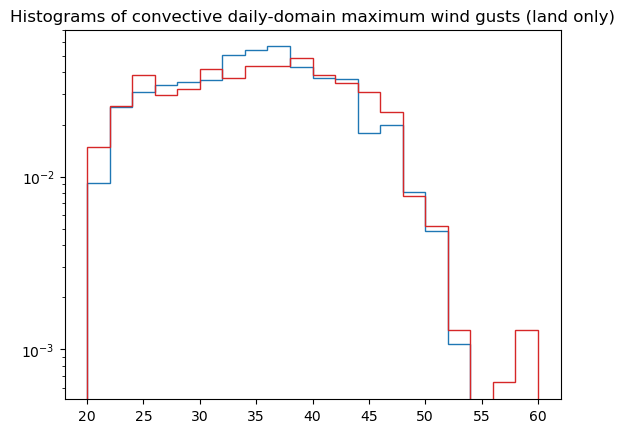

In [70]:
plt.title("Histograms of convective daily-domain maximum wind gusts (land only)")

plt.hist(hist_conv.query("cluster==1").gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),color="tab:blue",density=True)
plt.hist(rcp_conv.query("cluster==1").gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),density=True);

Text(0.5, 1.0, 'Convective daily-domain maximum gusts (land points only)')

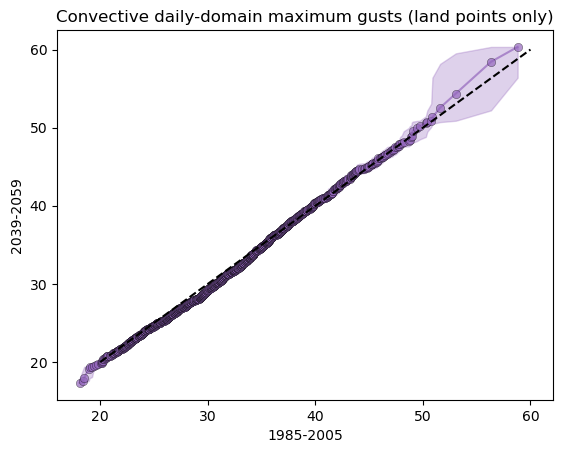

In [72]:
p=1000
plt.plot(np.percentile(hist_conv.gust_dmax,np.linspace(0,100,p)),np.percentile(rcp_conv.gust_dmax,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:purple")
mod_resamp = [np.percentile(rcp_conv.gust_dmax.values[np.random.randint(0,rcp_conv.shape[0],rcp_conv.shape[0])],np.linspace(0,100,p)) for N in np.arange(1000)]
plt.fill_between(np.percentile(hist_conv.gust_dmax,np.linspace(0,100,p)),np.percentile(np.stack(mod_resamp),2.5,axis=0),np.percentile(np.stack(mod_resamp),97.5,axis=0), color="tab:purple",alpha=0.3)
plt.plot([20,60],[20,60],color="k",ls="--")

plt.xlabel("1985-2005")
plt.ylabel("2039-2059")
plt.title("Convective daily-domain maximum gusts (land points only)")

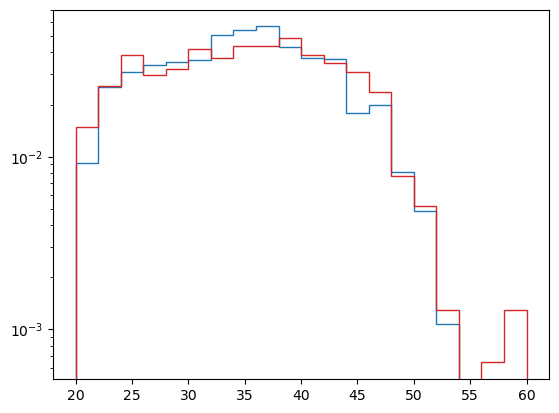

In [75]:
plt.hist(hist_conv.query("cluster==1").gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),color="tab:blue",density=True)
plt.hist(rcp_conv.query("cluster==1").gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),density=True);

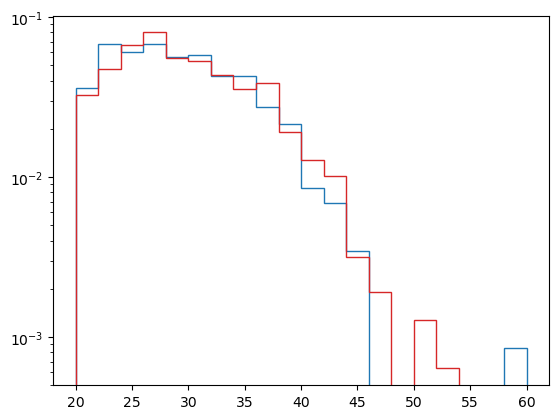

In [76]:
plt.hist(hist_conv.query("cluster==2").gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),color="tab:blue",density=True)
plt.hist(rcp_conv.query("cluster==2").gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),density=True);

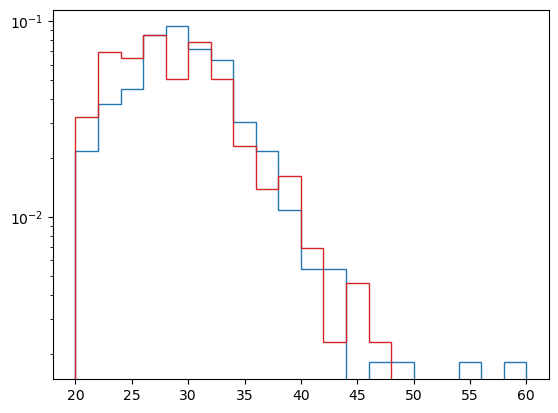

In [77]:
plt.hist(hist_conv.query("cluster==0").gust_dmax,log=True,histtype="step",bins=np.arange(20,62,2),color="tab:blue",density=True)
plt.hist(rcp_conv.query("cluster==0").gust_dmax,log=True,histtype="step",color="tab:red",bins=np.arange(20,62,2),density=True);